## Zillow
Create a python script or jupyter notebook named explore_zillow that does the following:

1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.
1. Plot a correlation matrix heatmap.
1. Plot latitude agains longitude.
1. Create a useable plot with 4 dimensions, e.g. x, y, color, size.
1. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.
1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wrangle_zillow import wrangle_zillow_data

In [2]:
df = wrangle_zillow_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32134 entries, 3 to 77380
Data columns (total 25 columns):
heatingorsystemtypeid           32134 non-null float64
propertylandusetypeid           32134 non-null float64
parcelid                        32134 non-null int64
logerror                        32134 non-null float64
transactiondate                 32134 non-null object
id                              32134 non-null int64
bathroomcnt                     32134 non-null float64
bedroomcnt                      32134 non-null float64
buildingqualitytypeid           32134 non-null float64
calculatedfinishedsquarefeet    32134 non-null float64
fips                            32134 non-null float64
latitude                        32134 non-null float64
longitude                       32134 non-null float64
lotsizesquarefeet               32134 non-null float64
rawcensustractandblock          32134 non-null float64
regionidcity                    32134 non-null float64
regionidcounty  

1.

In [4]:
continuous_data = df[['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'lotsizesquarefeet' ]]

<Figure size 1152x576 with 0 Axes>

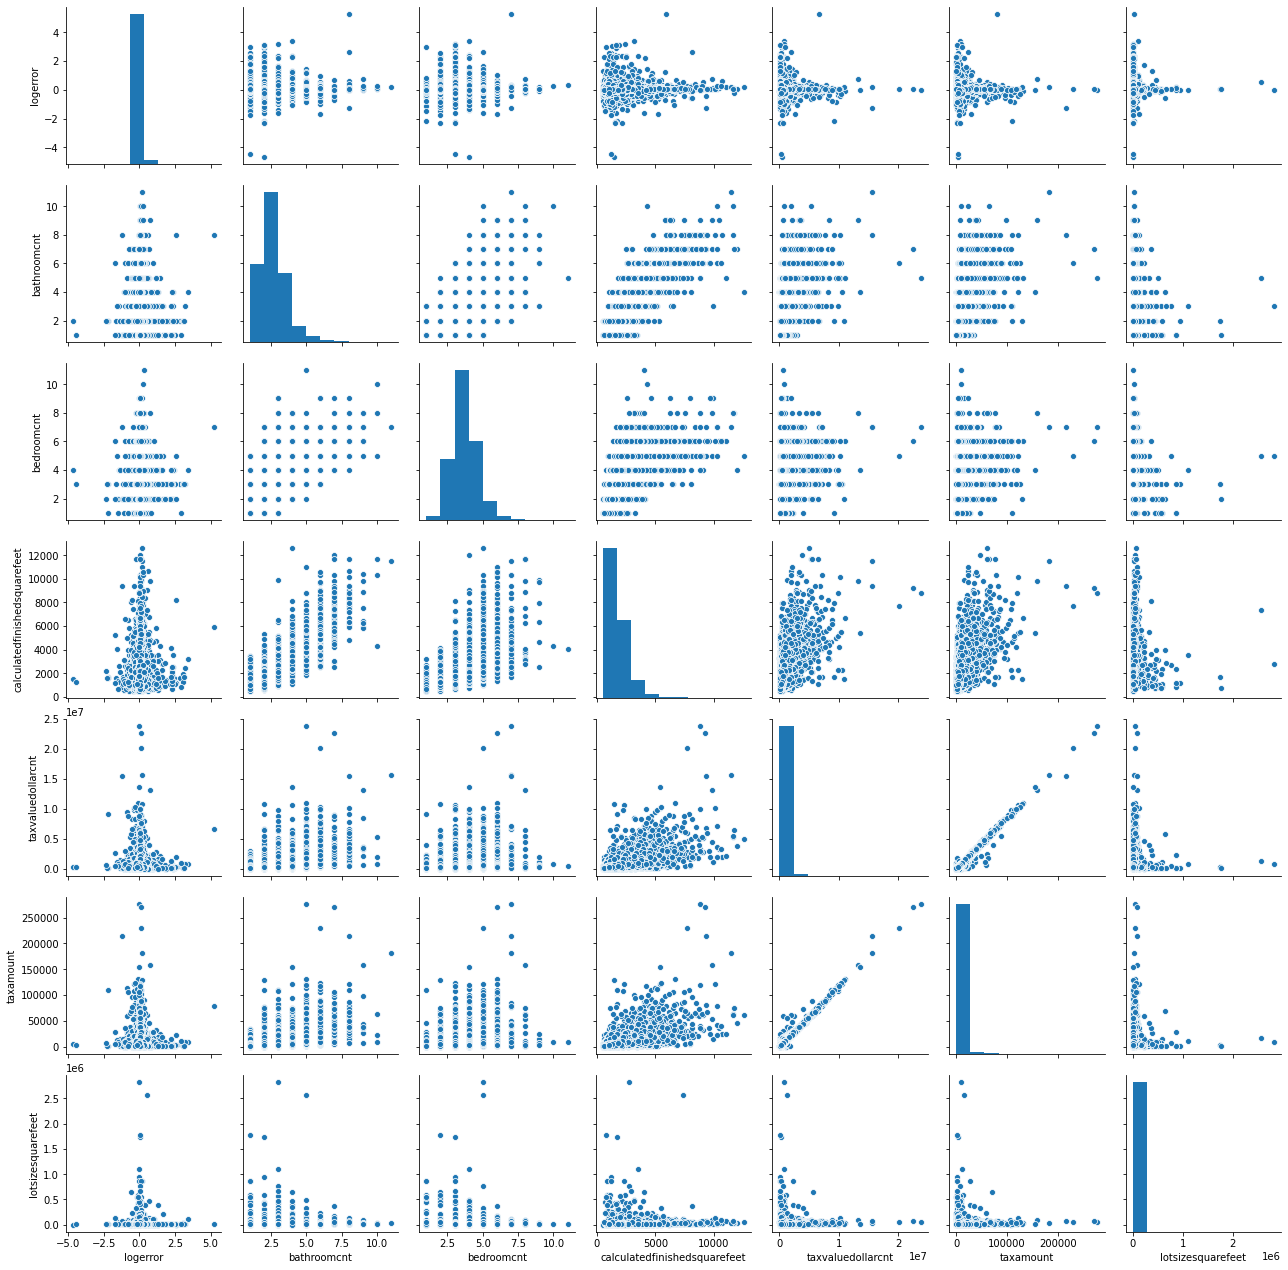

In [5]:
plt.figure(figsize=(16,8))
sns.pairplot(continuous_data)
plt.show()

2

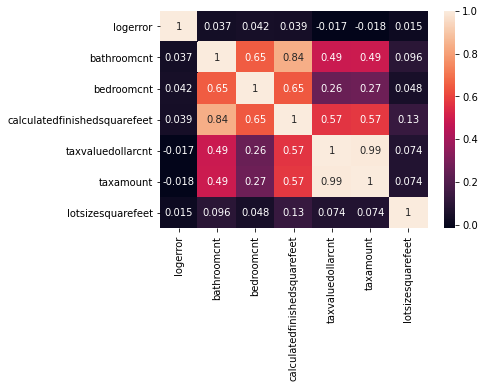

In [6]:
sns.heatmap(continuous_data.corr(), annot=True)
plt.show()

3.

In [7]:
lat_long = df[['latitude', 'longitude']]

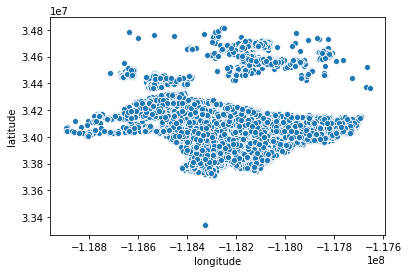

In [8]:
y = lat_long.latitude
x = lat_long.longitude
sns.scatterplot(x, y, data=lat_long)

4.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32134 entries, 3 to 77380
Data columns (total 25 columns):
heatingorsystemtypeid           32134 non-null float64
propertylandusetypeid           32134 non-null float64
parcelid                        32134 non-null int64
logerror                        32134 non-null float64
transactiondate                 32134 non-null object
id                              32134 non-null int64
bathroomcnt                     32134 non-null float64
bedroomcnt                      32134 non-null float64
buildingqualitytypeid           32134 non-null float64
calculatedfinishedsquarefeet    32134 non-null float64
fips                            32134 non-null float64
latitude                        32134 non-null float64
longitude                       32134 non-null float64
lotsizesquarefeet               32134 non-null float64
rawcensustractandblock          32134 non-null float64
regionidcity                    32134 non-null float64
regionidcounty  

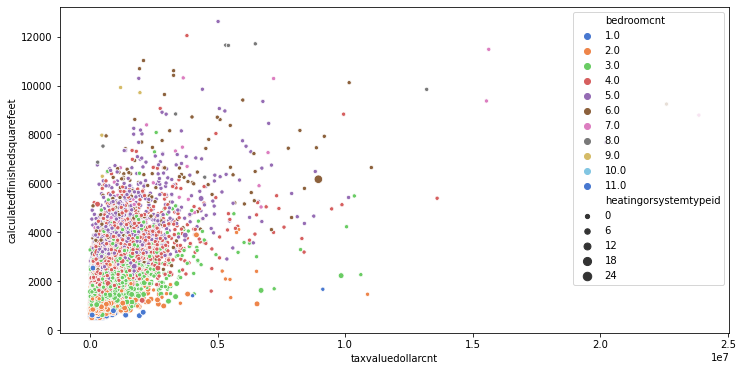

In [10]:
plt.figure(figsize=(12,6))
y = df.calculatedfinishedsquarefeet
x = df.taxvaluedollarcnt
z = df.bedroomcnt
d = df.heatingorsystemtypeid
sns.scatterplot(x, y, hue = z, size = d, data = df, palette='muted')

plt.show()

5.Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [12]:
logmean = df.groupby('regionidzip').logerror.mean().reset_index()
logmean['overall_mean_logerror'] = df.logerror.mean()

In [ ]:
import scipy.stats as stats



6. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?